# Visualising results from PINN

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from itertools import product

In [21]:
ds_lstm = xr.open_dataset("../data/processed/mse_LSTM.nc")
ds_phys = xr.open_dataset("../data/processed/mse_physical_model.nc")
ds_boost = xr.open_dataset("../data/processed/mse_boosted_model.nc")
ds_pinn = xr.open_dataset("../data/processed/mse_pinn.nc")

In [22]:
ds_pinn

<xarray.Dataset> Size: 2kB
Dimensions:  (k: 20, c: 11)
Coordinates:
  * k        (k) int32 80B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * c        (c) float64 88B 11.0 11.5 12.0 12.5 13.0 ... 14.5 15.0 15.5 16.0
Data variables:
    mse      (k, c) float64 2kB ...
Attributes:
    patience:     20
    epochs:       300
    lambda_phys:  0.1

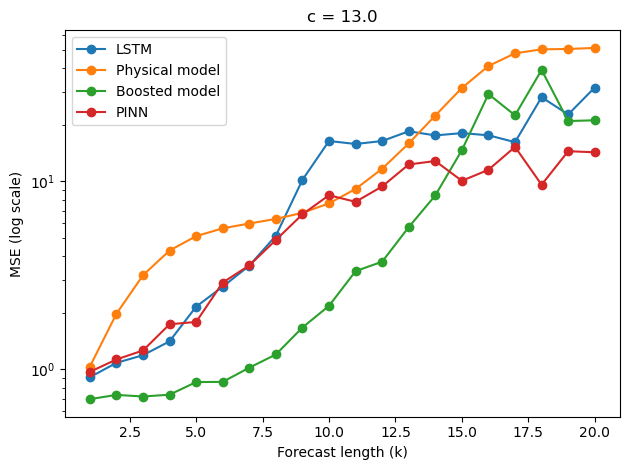

In [35]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ds_lstm.mse.plot(ax=ax, marker="o", linestyle="-", label="LSTM")
ds_phys.mse.sel(c=13).plot(ax=ax, marker="o", linestyle="-", label="Physical model")
ds_boost.mse.sel(c=13).plot(ax=ax, marker="o", linestyle="-", label="Boosted model")
ds_pinn.mse.sel(c=13).plot(ax=ax, marker="o", linestyle="-", label="PINN")

ax.set_ylabel("MSE (log scale)")
ax.set_xlabel("Forecast length (k)")
fig.tight_layout()


ax.legend()